2706 2408


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:148: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:159: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.


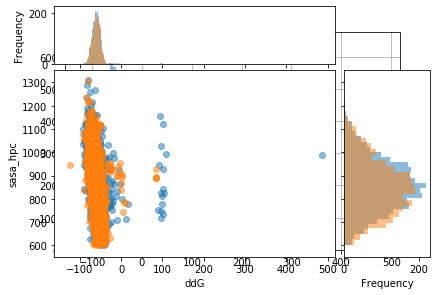

<Figure size 432x288 with 0 Axes>

In [24]:
import pandas as pd
import sys
import argparse
from sklearn.cluster import KMeans
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import NullFormatter
from matplotlib import rcParams
from os import path

def scatter_hist(x,y,x1,y1,xlab="",ylab=""):
    rcParams['font.family'] = 'sans-serif'
    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(4, 4))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y, alpha = 0.5)
    axScatter.scatter(x1, y1, alpha = 0.5)
    axScatter.yaxis.set_tick_params(labelsize=10)
    axScatter.xaxis.set_tick_params(labelsize=10)
    if xlab != "":
        axScatter.set_xlabel(xlab, fontsize=10)
    if ylab != "":
        axScatter.set_ylabel(ylab, fontsize=10)

    axHistx.hist(x, bins='auto', alpha = 0.5)
    axHistx.hist(x1, bins='auto', alpha = 0.5)
    axHisty.set_xlabel("Frequency", fontsize=10)
    axHisty.hist(y, bins='auto', orientation='horizontal', alpha = 0.5)
    axHisty.hist(y1, bins='auto', orientation='horizontal', alpha = 0.5)
    axHistx.set_ylabel("Frequency", fontsize=10)
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    axHisty.xaxis.set_tick_params(labelsize=10)
    axHistx.yaxis.set_tick_params(labelsize=10)

    plt.show()

def main():

    score_file_all = open("/home/akhmelin/scratch/helixfusions/gen2/design_3/processing/I32_all.sc").readlines()
    score_file = open("/home/akhmelin/scratch/helixfusions/gen2/design_3/processing/I32.sc").readlines()
    #rescored_file = open("I32_rescored_2.sc").readlines()
    
    headers =  score_file_all[0].split()[1:]
    score_data = [line.split()[1:] for line in score_file_all[1:]] #score data
    headers2 =  score_file[0].split()[1:]
    score_data2 = [line.split()[1:] for line in score_file[1:]] #rescored data

    
    score_df = pd.DataFrame(score_data, columns = headers, dtype=float)
    score_df = score_df.sort_values(by=["ddG"]) #to get the highest scores on top of the list

    score_df_2 = pd.DataFrame(score_data2, columns = headers2, dtype=float)
    score_df_2 = score_df_2.sort_values(by=["ddG"]) #to get the highest scores on top of the list
    
    print(len(score_df), len(score_df_2))
    #print(score_df)
    
#    filtered_df = score_df.loc[score_df["ddG"] < -100] #filter for ddG  
#    filtered_df = filtered_df.loc[score_df["ddG"] > -1100]
#    filtered_df = filtered_df.loc[score_df["sasa_1comp"] > 2000]
#    filtered_df = filtered_df.loc[score_df["sasa_1comp"] < 4000]
#    filtered_df = score_df.loc[score_df["ddG_sasa"] < 0] #filter for ddG per sasa
#    filtered_df = filtered_df.loc[score_df["clash_check_1comp"] == 0] #filter for clashes
#    filtered_df = filtered_df.loc[score_df["sc1_1comp"] >= 0.6] #filter for shape complementarity

#    filtered_df_2 = score_df.loc[score_df["ddG"] < -100] #filter for ddG  
#    filtered_df_2 = filtered_df_2.loc[score_df["ddG"] > -1100]
#    filtered_df_2 = filtered_df_2.loc[score_df["sasa_1comp"] < 2000]
#    filtered_df_2 = filtered_df_2.loc[score_df["sasa_1comp"] > 600]
#    filtered_df = score_df.loc[score_df["ddG_sasa"] < 0] #filter for ddG per sasa
#    filtered_df_2 = filtered_df_2.loc[score_df["clash_check_1comp"] == 0] #filter for clashes
#    filtered_df_2 = filtered_df_2.loc[score_df["sc1_1comp"] >= 0.6] #filter for shape complementarity
    
    
#    For I32:
#    ddG < -100
#    ddG > -1100
#    sasa_1comp > 800
#    clash == 0
#    sc1_1comp >= 0.6

#    For O32:
#    ddG < -100
#    ddG > -1100
#    sasa_1comp > 2500
#    sasa_1comp < 4000
#    clash == 0
#    sc1_1comp >= 0.6

#    For T32:
#    ddG < -100
#    ddG > -1100
#    sasa_1comp > 2000
#    sasa_1comp < 4000
#    clash == 0
#    sc1_1comp >= 0.6

#    For T32:
#    ddG < -100
#    ddG > -1100
#    sasa_1comp > 600
#    sasa_1comp < 2000
#    clash == 0
#    sc1_1comp >= 0.6



#    print(len(filtered_df))
#    print(len(filtered_df_2))
    
#    filtered_df = filtered_df.loc[score_df["mutations"]<=15]
#    filtered_df = filtered_df.loc[score_df["uhb"]<3]
    
#    print(len(filtered_df))

    
    #Plot for visualization

#    histogram_sasa_1comp = score_df.sasa_1comp.hist()
    fig1 = plt.figure()
    histogram_ddG = score_df.ddG.hist(bins=100, alpha=0.5)
    histogram_ddG_2 = score_df_2.ddG.hist(bins=35, alpha=0.5)
    plt.savefig('/home/akhmelin/scratch/helixfusions/gen2/design_3/processing/ddG_I32.png')
    plt.show(fig1)
#    histogram_AroCount = score_df.uhb.hist()
#    histogram_MetCount = score_df.MetCount.hist()
#    histogram_sasa = score_df.sasa_1comp.hist()
    
    
#    scatter_ddG_sasa = score_df.plot.scatter("ddG", "sasa_hpc")
#    scatter_ddG_sasa_2 = score_df_2.plot.scatter("ddG", "sasa_hpc")
    fig2 = plt.figure()
    scatter_hist(score_df.ddG, score_df.sasa_hpc, score_df_2.ddG, score_df_2.sasa_hpc, xlab="ddG", ylab="sasa_hpc")
    plt.savefig('/home/akhmelin/scratch/helixfusions/gen2/design_3/processing/ddG_sasa_I32.png')
    plt.show(fig2)
    
#    scatter_rescored_ddG_sasa = rescored_df.plot.scatter("ddG", "sasa_1comp")
#    scatter_AroCount_sasa = score_df.plot.scatter("AroCount", "sasa_1comp")
#    scatter_ddGsasa_mutations = filtered_df.plot.scatter("uhb", "mutations") 
#    scatter_ddGsasa_mutations = score_df.plot.scatter("ddG_sasa", "ddG") 

#    filtered = open("T32/T32_filtered", "w+")
#    index = filtered_df.index.tolist()
#    for i in index:
#        filtered.write(score_file[i+1])
        
#    filtered = open("T32/T32_filtered_2", "w+")
#    index = filtered_df_2.index.tolist()
#    for i in index:
#        filtered.write(score_file[i+1])

main()

